Benoit's version:
## PAP Model
To do:
x Draw the 3D mac graph
* Make the iterations code Figure 2 and Figure 3 in Matlab

In [130]:
#import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ZAF as zaf
import CalcI_file
from CalcI_file import CalcI
from matplotlib import cm
# to display dataframes

# INPUTS
# concentration
# Indices in Python start at 0
################ INPUTS ###################
Meas_El = [11, 19, 20, 22, 25, 26, 24, 8, 14, 13, 12, 15, 56, 28, 9, 17]  # length 16
Meas_El = np.array(Meas_El)
Meas_El = Meas_El - 1
element_indices = np.array([8,12,14]) # atomic numbers
element_indices = element_indices - 1 # python start at zero
# Std_AtWtPc
number_of_standards = 10
Cel = np.zeros((number_of_standards,92))
Std_AtWtPc = Cel

Std_AtWtPc[:, [10, 18, 19, 21, 24, 25, 23, 7, 13, 12, 11, 14, 55, 27, 8, 16]] = np.array([
    [8.75,0.02,0.00,0.00,0.00,0.05,0.00,48.82,32.13,10.25,0.00,0.00,0.00,0.00,0.00,0.00],
    [0.80,12.40,0.00,0.00,0.00,0.00,0.00,46.14,30.06,9.90,0.00,0.00,0.00,0.00,0.00,0.00],
    [1.03,0.00,15.33,0.00,0.06,1.24,1.08,44.38,25.68,1.06,10.10,0.00,0.00,0.04,0.00,0.00],
    [0.00,0.00,0.00,31.76,36.42,0.00,0.00,31.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
    [0.00,0.00,0.00,0.00,0.00,69.93,0.00,30.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
    [0.00,0.00,0.00,0.00,0.00,0.00,68.45,31.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
    [0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.26,46.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
    [0.00,0.00,3.00,0.00,0.37,17.14,0.00,42.52,18.36,11.76,6.86,0.00,0.00,0.00,0.00,0.00],
    [0.00,0.00,39.02,0.00,0.00,0.00,0.00,38.92,0.00,0.00,0.00,18.31,0.00,0.00,3.40,0.35],
    [0.00,0.00,0.00,0.00,0.00,2.39,0.00,45.00,19.65,0.00,32.88,0.00,0.00,0.00,0.00,0.00],
])
Std_AtWtPc = Std_AtWtPc/100
# Standards to use with each acquisition
number_of_acquisitions = 3
EPMA_Std = np.zeros((number_of_acquisitions,92))
EPMA_Std[:,[10, 18, 19, 21, 24, 25, 23, 7, 13, 12, 11, 14]] =np.array([
    [1,2,3,4,4,5,6,7,3,2,3,0], # have changed the last value
    [1,2,3,4,4,5,6,7,3,2,3,0], # have changed the last value
    [1,2,3,4,4,5,6,7,3,2,3,0], # have changed the last value
])
# Std_AtWtPc[:, [11,12,7,24]] = np.array([
#     [60.3, 0, 39.7, 0],  # MgO
#     [0, 52.92, 47.08, 0],  # Al2O3
#     [0, 0, 30.06, 69.94]  # Fe2O3 15kV, 10nA
# ])
# print(Std_AtWtPc)
################ INPUTS ###################

# np.put(Cel, element_indices, [8.75,0.02,0.00,0.00,0.00,0.05,0.00,48.82,32.13,10.25,0.00,0.00,0.00,0.00,0.00,0.00])

# importing all elements with their atomic number, atomic weights and density
elements_df = zaf.get_element([])
# importing all the macs
# mac_df = pd.read_csv("Henke 1993_modified.txt")
mac_df = pd.read_csv("MAC30.txt")

# converting element_df into a numpy Z,A,Density
A_np = np.zeros((1,92))
Z_np = np.zeros((1,92))
density_np = np.zeros((1,92))
for i in range(0,92): # element zAbs
        A_np[0,i] = elements_df[['molar_mass','element']].to_numpy()[i,0]
        Z_np[0,i] = elements_df[['atomic_number','element']].to_numpy()[i,0]
        density_np[0,i] = elements_df[['density','element']].to_numpy()[i,0]
# number of standards
nStd = 3
#EPMA_Std
Std_AtWtPc

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.882e-01, 0.000e+00, 0.000e+00, 8.750e-02, 0.000e+00,
        1.025e-01, 3.213e-01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e-04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 5.000e-04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

In [131]:
# EXTRACTING THE MACKALPHA...
## MACKalpha
MACKalpha = mac_df[['zAbs', 'zMes','Ka']]
MACKbeta = mac_df[['zAbs', 'zMes', 'Kb']]
MACLalpha = mac_df[['zAbs', 'zMes', 'La']]
MACLbeta = mac_df[['zAbs', 'zMes', 'Lb']]
MACLl = mac_df[['zAbs', 'zMes', 'Ll']]
MACMa = mac_df[['zAbs', 'zMes', 'Ma']]
MACMb = mac_df[['zAbs', 'zMes', 'Mb']]

# reorganizing the matrix to have 92x92
MACKalpha_np_indices = MACKalpha.to_numpy()
MACKbeta_np_indices = MACKbeta.to_numpy()
MACLalpha_np_indices = MACLalpha.to_numpy()
MACLbeta_np_indices = MACLbeta.to_numpy()
MACLl_np_indices = MACLl.to_numpy()
MACMa_np_indices = MACMa.to_numpy()
MACMb_np_indices = MACMb.to_numpy()

# MAC Matrices
MACKalpha_np = np.zeros((92,92))
MACKbeta_np = np.zeros((92,92))
MACLalpha_np = np.zeros((92,92))
MACLbeta_np = np.zeros((92,92))
MACLl_np = np.zeros((92,92))
MACMa_np = np.zeros((92,92))
MACMb_np = np.zeros((92,92))

for i in range(0,92): # element zAbs
    for j in range(1,93): # element zMes
        MACKalpha_np[i,j-1] = MACKalpha_np_indices[(j-1) + 92 * i,2]
        MACKbeta_np[i,j-1] = MACKbeta_np_indices[(j-1) + 92*i, 2]
        MACLalpha_np[i,j-1] = MACLalpha_np_indices[(j-1) + 92*i, 2]
        MACLbeta_np[i,j-1] = MACLbeta_np_indices[(j-1) + 92*i, 2]
        MACLl_np[i,j-1] = MACLl_np_indices[(j-1) + 92*i, 2]
        MACMa_np[i,j-1] = MACMa_np_indices[(j-1) + 92*i, 2]
        MACMb_np[i,j-1] = MACMb_np_indices[(j-1) + 92*i, 2]
# Matrix wasn't having same order like Matlab so we need to transpose
MACKalpha_np = MACKalpha_np.transpose()
MACKbeta_np = MACKbeta_np.transpose()
MACLalpha_np = MACLalpha_np.transpose()
MACLbeta_np = MACLbeta_np.transpose()
MACLl_np = MACLl_np.transpose()
MACMa_np = MACMa_np.transpose()
MACMb_np = MACMb_np.transpose()
# show
MACKalpha_np

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

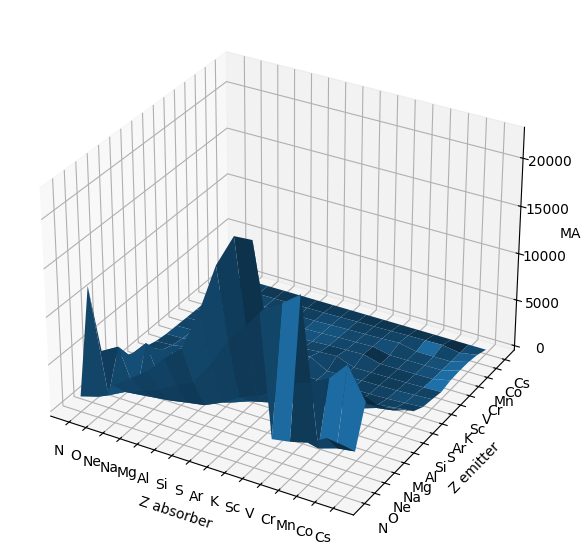

In [132]:
from mpl_toolkits.mplot3d import Axes3D


Meas_Elsort = sorted(Meas_El)
NameEl = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U']

nMsEl = len(Meas_Elsort)

# Assuming MACkalpha is a 2D numpy array
MACkalpha_Ms = MACKalpha_np[np.ix_(np.array(Meas_Elsort), np.array(Meas_Elsort))]

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(np.arange(nMsEl), np.arange(nMsEl))
ax.plot_surface(X, Y, MACkalpha_Ms) #, cmap=cm.coolwarm

ax.set_xticks(np.arange(nMsEl))
ax.set_yticks(np.arange(nMsEl))

ax.set_xticklabels([NameEl[i-1] for i in Meas_Elsort])  # Python indexing starts at 0
ax.set_yticklabels([NameEl[i-1] for i in Meas_Elsort])  # Python indexing starts at 0

#ax.set_zscale('log')

ax.set_xlabel('Z absorber')
ax.set_ylabel('Z emitter')
ax.set_zlabel('MAC')

plt.show()



In [133]:
# importing the global variable in the module
eps = 3 * 2.2204e-16
CalcI_file.A_np = A_np
CalcI_file.Z_np = Z_np
CalcI_file.MeasuredEl = (Std_AtWtPc > eps)[0]
# CalcI_file.element_indices = element_indices
"""
    @ should be changed you are not dealing with K lines
"""
Eo = 15 # keV
# checked with data of benoit
# import scipy.io
# MACKalpha_b = scipy.io.loadmat('MACKalpha_benoit.mat')
# MACKalpha_b = MACKalpha_b['MAC']
# print(MACKalpha_b)
# print(MACKalpha_b[3,14])
# print(MACKalpha_b)
""" Cel is the Std_AtWtPc """
# print(CalcI(Cel,Eo,MACKalpha_np)) # verified gives the same result like the benoit!

' Cel is the Std_AtWtPc '

In [134]:
# regression


# standards weight fractions
element_indices = np.array([11, 19, 20, 22, 25, 26, 24, 8, 14, 13, 12, 15, 56, 28, 9, 17]) # atomic numbers
element_indices = element_indices - 1 
""" @Standard composition (At. wt. %) - ! should convert!!!!!! """
# Std_AtWtPc = np.zeros((nStd,92))
# np.put(Std_AtWtPc,element_indices,[8.75,0.02,0.00,0.00,0.00,0.05,0.00,48.82,32.13,10.25,0.00,0.00,0.00,0.00,0.00,0.00])

# python start at zero
# 
# Cel = np.zeros((1,92))
# np.put(Cel, element_indices, [8.75,0.02,0.00,0.00,0.00,0.05,0.00,48.82,32.13,10.25,0.00,0.00,0.00,0.00,0.00,0.00])
# Cstd = Std_AtWtPc/100 already divided by 100 when assigning
""" Should we divid by 100 or not!? """
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""" SHOULD FIX THIS to be related to EPMA_Std"""""
# Assuming EPMA_Std is a numpy array
Cstd = np.zeros_like(EPMA_Std) * np.nan
# verified same result as benoit for "which"
which = EPMA_Std > 0# I used minus one instead of zero because in matlab 0 isn't used but python it is  # select used standards - khalil: elements present in the standard sample
# print('which size', which.shape)
# print('which', which)
#row = EPMA_Std[which]
#row = 
# print("EPMA_Std[which].shape", EPMA_Std[which].shape)
indices = np.where(which)
row = EPMA_Std[indices]
# fix the repetition from in row 
oneline = int(which.sum() / nStd)
# print('oneline', oneline)
# print('Row before modification', row, oneline)
# row = np.repeat(row[:oneline],3)
Zel = list(range(1, 93))
Zelrep = np.tile(Zel, (len(EPMA_Std), 1)) # verified correct
col = Zelrep[which]
row_modified = []
####################### Fixing the order of col and row
# pay attention to this part if there is a problem
for j in range(which[0,:].sum()):
    for i in range(number_of_acquisitions):
        row_modified.append(row[j+i*which[0,:].sum()])
row_modified = np.array(row_modified)
# col modification
col_modified = []
# pay attention to this part if there is a problem
for j in range(which[0,:].sum()):
    for i in range(number_of_acquisitions):
        col_modified.append(col[j+i*which[0,:].sum()])
col_modified = np.array(col_modified)

row = row_modified
col = col_modified
#######################
# sz = Std_AtWtPc.shape
# ind = np.ravel_multi_index((row.astype(int), col.astype(int)), sz)
# Cstd[which] = Std_AtWtPc.flat[ind]


for i in range(Cstd.shape[1]):
    for j in range(Cstd.shape[0]):
        Cstd[j,i] = Std_AtWtPc[EPMA_Std[j,i].astype(int)-1,i]
    
# print("Zel",Zel)
# print("row", row, row.size)
# print("col", col)
# print("sz", sz)
# print('Cstd', Cstd.shape)
# print('Std_AtWtPc', Std_AtWtPc)

print('Row: ', row)
print('Col: ', col)
print('Sz:', sz)
print('ind:',ind)
Cstd

Row:  [7. 7. 7. 1. 1. 1. 3. 3. 3. 2. 2. 2. 3. 3. 3. 2. 2. 2. 3. 3. 3. 4. 4. 4.
 6. 6. 6. 4. 4. 4. 5. 5. 5.]
Col:  [ 8  8  8 11 11 11 12 12 12 13 13 13 14 14 14 19 19 19 20 20 20 22 22 22
 24 24 24 25 25 25 26 26 26]
Sz: (10, 92)
ind: [652 652 652 103 103 103 288 288 288 197 197 197 290 290 290 203 203 203
 296 296 296 390 390 390 576 576 576 393 393 393 486 486 486]


array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.5326,
        0.    , 0.    , 0.0875, 0.101 , 0.099 , 0.2568, 0.    , 0.    ,
        0.    , 0.    , 0.124 , 0.1533, 0.    , 0.3176, 0.    , 0.6845,
        0.3642, 0.6993, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.5326,
        0.    , 0.    , 0.0875, 0.101 , 0.099 , 0.2568, 0.    , 0.    ,
        0.    , 0.    ,

In [135]:
# print('Std_AtWtPc', Std_AtWtPc.shape)
# print(Std_AtWtPc[:,element_indices])
IntPAPstd = np.zeros((nStd, 92))
# standard intensity PAP 
""" IntPAPstd seems to give the same result as benoit code """
for i in range(nStd):
    print(Std_AtWtPc[i].shape)
    IntPAPstd[i,:] = CalcI(Std_AtWtPc[i], Eo, MACKalpha_np) 
    """ NO need to divid by 100 Std_ATwtpc"""
print("IntPAPstd", IntPAPstd[2,:])
print("Std_AtWtPc: ", Std_AtWtPc[0],Std_AtWtPc[0].shape)

(92,)
Cel_MeasuredEl [4.882e-01 8.750e-02 1.025e-01 3.213e-01 2.000e-04 5.000e-04]
(92,)
Cel_MeasuredEl [0.4614 0.008  0.099  0.3006 0.124  0.    ]
(92,)
Cel_MeasuredEl [0.4438 0.0103 0.0106 0.2568 0.     0.0124]
IntPAPstd [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.42482856e-04
 0.00000000e+00 0.00000000e+00 4.18012118e-06 0.00000000e+00
 3.11849100e-06 7.13285831e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.70338577e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00

C:\Users\khalil\Documents\MEGA\PhD\Results and experiments\Quantification\CalcI_file.py:197: RuntimeWarning: overflow encountered in exp
  Int2atRx = -(2 * A2 * np.exp(-Chi* Rx))/ (Chi**3) #%(2 * A2. * exp(-Chi. * Rc)). / (Chi. ^ 3);


In [136]:
# Intensities
element_indices_intensities = np.array([11, 19, 20, 22, 25, 26, 24, 8, 14, 13, 12, 15]) # atomic numbers
element_indices_intensities = element_indices_intensities - 1
""" Isp & Istd seems to be correct """
Isp = np.zeros((1,92))
Istd = np.zeros((1,92))

np.put(Istd, element_indices_intensities, [120.5,161.2,244.1,683.4,156.6,326,280.6,156.6,381.9,142.2,255.8,0]) # checked
# np.put(Isp, element_indices_intensities, [-0.1391,-0.2086, -0.2483, -0.2583,-0.1291, -0.1490, -0.0993, 155.9192, 741.2866,-0.2086, 0.0397, 0.0000]) # checked
np.put(Isp, element_indices_intensities, [13.9690,0.2227,159.7799,3.9900,0.3139,16.3907,1.2150,138.7015,399.2397,16.3503,316.2159,0.0000]) # checked

# remove negative values 
Istd[Istd < 0] = 0
Isp[Isp < 0] = 0

# k ratios
KRatiosMsrd = (Isp/Istd) # checked
KRatiosMsrd

array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan, 0.88570562,        nan,        nan,
        0.11592531, 1.23618413, 0.11498101, 1.04540377,        nan,
               nan,        nan,        nan, 0.00138151, 0.65456739,
               nan, 0.00583845,        nan, 0.00433001, 0.00200447,
        0.05027822,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,     

In [137]:

""" This part of the code wasn't added """
# KRatiosMsrdNorm = KRatiosMsrd;
# KRatiosMsrdNorm(KRatiosMsrdNorm~=KRatiosMsrdNorm) = 0; % to remove NaN values
# KRatiosMsrdNorm = KRatiosMsrdNorm ./ repmat(sum(KRatiosMsrdNorm,2),1,92); % normalize
# KRatiosMsrdNorm(Isp~=Isp) = NaN;
""" END """
""" Cstd is different from benoit, mine should be correct because his change the values after assigning StdAtWt to Cstd"""
Csp_i = (Isp/Istd) * Cstd # Castaing's first approximation
print('Isp', Isp)
print('Istd', Istd)
print('Cstd',Cstd)
Csp_i

Isp [[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 1.387015e+02 0.000000e+00 0.000000e+00
  1.396900e+01 3.162159e+02 1.635030e+01 3.992397e+02 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 2.227000e-01 1.597799e+02
  0.000000e+00 3.990000e+00 0.000000e+00 1.215000e+00 3.139000e-01
  1.639070e+01 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.00

array([[           nan,            nan,            nan,            nan,
                   nan,            nan,            nan, 4.71726813e-01,
                   nan,            nan, 1.01434647e-02, 1.24854597e-01,
        1.13831203e-02, 2.68459688e-01,            nan,            nan,
                   nan,            nan, 1.71307692e-04, 1.00345181e-01,
                   nan, 1.85429324e-03,            nan, 2.96388988e-03,
        7.30027969e-04, 3.51595598e-02,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,         

In [138]:
##
np.nan_to_num(Csp_i, copy=False, nan=0, posinf=0, neginf=0)
#
ntests = 5
j = 0
IntPaPsp_t = np.zeros((ntests+1, 92))
KRatiosMdl = IntPaPsp_t
KRatiosMdlNorm = IntPaPsp_t
print('KRatiosMdl', KRatiosMdl)
Csps = np.zeros((ntests+1, 92))
Csp_t = Csp_i[j,:]
Csps[0,:] = Csp_t.reshape(92,1).flatten()
print('Csps', Csps)
print('Csp_t', Csp_t)

KRatiosMdl [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

Csp_t [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.71726813e-01
 0.00000000e+00 0.00000000e+00 1.01434647e-02 1.24854597e-01
 1.13831203e-02 2.68459688e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.71307692e-04 1.00345181e-01
 0.00000000e+00 1.85429324e-03 0.00000000e+00 2.96388988e-03
 7.30027969e-04 3.51595598e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.

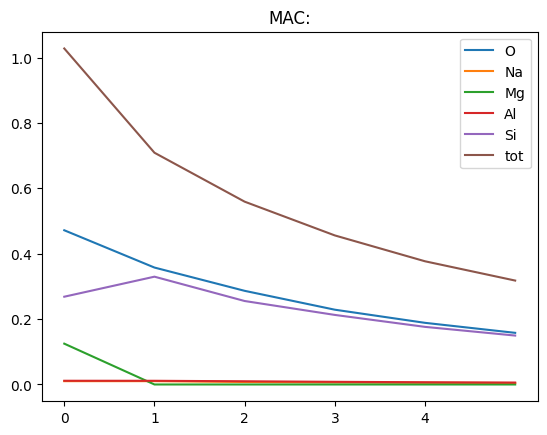

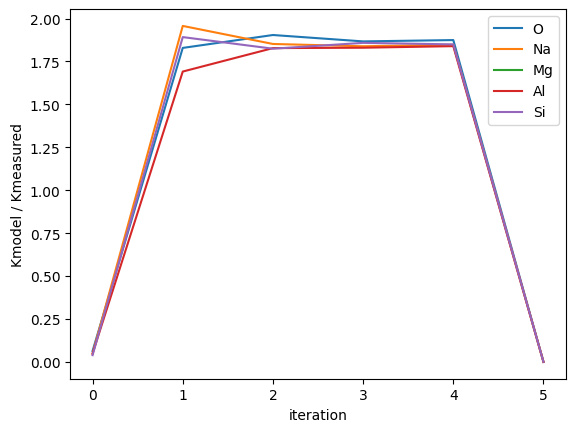

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.71726813e-01,
        0.00000000e+00, 0.00000000e+00, 1.01434647e-02, 1.24854597e-01,
        1.13831203e-02, 2.68459688e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.71307692e-04, 1.00345181e-01,
        0.00000000e+00, 1.85429324e-03, 0.00000000e+00, 2.96388988e-03,
        7.30027969e-04, 3.51595598e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [139]:

""""""""""""""""""""" VERIFIED UNTIL HERE """""""""""""""""""""
""" There is a problem in the loop Csps should start at 1 not zero because zero is already filled"""
print("Csp_t", Csp_t, Csp_t.shape)
for i in range(ntests):
    #Csp_t[Csp_t < 0] = 0
    ##
    print(i)
    # print(Csp_t.reshape(92,1).flatten().shape)
    # print(Csp_t.reshape(92,1).flatten())
    IntPaPsp_t[i,:] = CalcI(Csp_t.flatten(), Eo, MACKalpha_np)
    print('Csp_t flatten:', Csp_t.flatten())
    print('IntPaPsp_t', IntPaPsp_t[i,:])
    # print("Iteration : ", i, 'IntPapsp', IntPaPsp_t[i+1,:])
    # print('Csp_t', Csp_t.reshape(92,1).flatten().shape)
    # print('Csp_t before flatten', Csp_t)
    # print('Csp_t after flatten', Csp_t.reshape(92,1).flatten())
    IntRatio = IntPaPsp_t[i,:]/IntPAPstd[j]
    # print('i: ',i)
    # print('IntPAPsp_t', IntPaPsp_t[i,:])
    # print('IntPAPstd', IntPAPstd[j,:])
    sumKmdl = sum(IntRatio[IntRatio > 0])
    sumKmsrd = sum(KRatiosMsrd[KRatiosMsrd > 0])
    rat = sumKmsrd/sumKmdl
    Csp_t = Csp_t * KRatiosMsrd/(IntRatio) # Kratiosmsrd is ok not zero
    print('IntRatio', IntRatio)
    np.nan_to_num(Csp_t, copy=False, nan=0, neginf=0, posinf=0)
    KRatiosMdl[i,:] = IntRatio * rat
    Csps[i+1,:] = Csp_t

df = pd.DataFrame(Csps, columns=elements_df.element[elements_df.index < 92])

# print(df.loc[:, df.ne(0).any()])

# Assuming Csps, KRatiosMdl, KRatiosMsrd, j, and Macfilename are defined
Tot = np.nansum(Csps, axis=1)
whichEl = [7,10,11,12,13]  # Python indexing starts at 0
nselecEl = len(whichEl)

plt.figure()
plt.plot(Csps[:, [7,10,11,12,13]])  # Python indexing starts at 0
plt.plot(Tot)
plt.xticks(np.arange(0, ntests, 1))
plt.legend([NameEl[i] for i in whichEl] + ['tot'])
plt.title(f'MAC:')


# print('KratioMdl')
# print(KRatiosMdl)
# print('KratiosMsrd')
# print(KRatiosMsrd)
print('---------------------------------------------------')
# print(KRatiosMsrd[:, whichEl])
# print(KRatiosMdl.size)
# print(KRatiosMsrd.size)
# print(KRatiosMdl)
# print(KRatiosMsrd)
j = 0 # standard used
Kdiv = KRatiosMdl[:,whichEl] / KRatiosMsrd[j][whichEl]
print(Kdiv)

plt.figure()
plt.plot(Kdiv)


# print(Kdiv)
plt.legend([NameEl[i] for i in whichEl])
plt.ylabel('Kmodel / Kmeasured')
plt.xlabel('iteration')
plt.show()

# print(IntPaPsp_t)
# print('#########################################################')
# print("Csps", Csps , Csps.shape)
Csps